<a href="https://colab.research.google.com/github/apinee/zomato/blob/main/ZOMATO_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the Company  
Zomato is a global restaurant discovery and food delivery platform that connects users with a wide array of restaurants, enabling them to explore cuisines, book tables, place online orders, and leave reviews and ratings. The platform focuses on providing seamless experiences through its robust database of restaurant information, customer feedback, and cost-effective dining options. With its dynamic features and user-friendly interface, Zomato has transformed how people interact with dining establishments.

---

### Key Questions  
1. **Customer Experience**  
   - What are the average ratings and votes received by restaurants in different categories?  
   - How does the availability of online ordering or table booking influence customer ratings?  

2. **Operational Performance**  
   - Which type of restaurants (e.g., Buffet, Delivery, Fine Dining) attract the highest customer engagement (ratings, votes)?  
   - What are the common pricing patterns for restaurants in different categories?  

3. **Market Trends**  
   - Which restaurant types are the most listed and in demand?  
   - How do regional preferences impact the popularity of various cuisines or services (e.g., buffet vs. à la carte)?  

---

### Business Task  
**Objective**:  
To analyze the Zomato dataset and derive actionable insights that enhance customer engagement and optimize business performance. This includes identifying patterns in customer preferences, pricing strategies, and service offerings (online orders, table booking).  

**Deliverables**:  
- Generate a report identifying high-performing restaurants and common factors contributing to their success.  
- Propose data-driven recommendations for improving restaurant listings and promoting customer engagement.  
- Develop a pricing strategy that aligns with customer expectations while ensuring profitability.  

**importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection

**loading and reading the dataset**

In [3]:
data = pd.read_csv("/content/Zomato data .csv")

In [ ]:
data.tail()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


(148, 7)

In [17]:
data.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,NaN,775,800,Buffet
1,Spice Elephant,1,0,NaN,787,800,Buffet
2,San Churro Cafe,1,0,NaN,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,NaN,88,300,Buffet
4,Grand Village,0,0,NaN,166,600,Buffet


In [5]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:

data['online_order'] = data['online_order'].replace({'Yes':1,'No':0})
data['book_table'] = data['book_table'].replace({'Yes':1,'No':0})

<ipython-input-6-92b4e8f2db01>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['online_order'] = data['online_order'].replace({'Yes':1,'No':0})
<ipython-input-6-92b4e8f2db01>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['book_table'] = data['book_table'].replace({'Yes':1,'No':0})


In [7]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1/5,775,800,Buffet
1,Spice Elephant,1,0,4.1/5,787,800,Buffet
2,San Churro Cafe,1,0,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,300,Buffet
4,Grand Village,0,0,3.8/5,166,600,Buffet


**Cleaning the data:Removing the missing values**

In [8]:

data = data.dropna()


data = data.drop_duplicates()

Average rates and votes received by different category

In [9]:

data['rate'] = pd.to_numeric(data['rate'], errors='coerce')


average_ratings_votes = data.groupby('listed_in(type)')[['rate', 'votes']].mean()

average_ratings_votes

,rate,votes
listed_in(type),,
Buffet,NaN,432.571429
Cafes,NaN,279.739130
Dining,NaN,185.118182
other,NaN,1170.875000


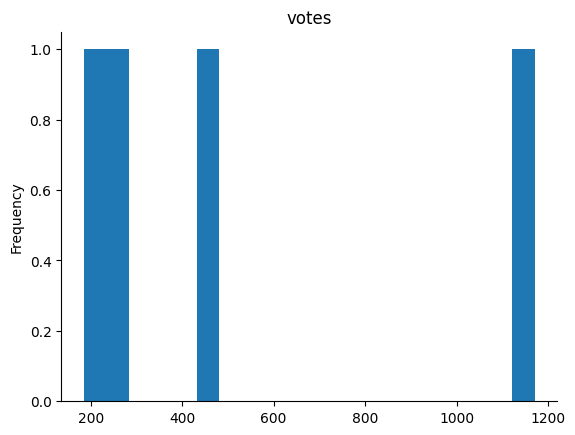

In [13]:

from matplotlib import pyplot as plt
average_ratings_votes['votes'].plot(kind='hist', bins=20, title='votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

Average rating when online booking is done

In [12]:
rating_by_service = data.groupby(['online_order', 'book_table'])['rate'].mean()

rating_by_service

online_order  book_table
0             0            NaN
              1            NaN
1             0            NaN
              1            NaN
Name: rate, dtype: float64

                 count        mean         std    min    25%    50%    75%  \
listed_in(type)                                                              
Buffet             7.0  671.428571  188.982237  300.0  600.0  800.0  800.0   
Cafes             23.0  545.652174  165.771642  200.0  475.0  550.0  600.0   
Dining           110.0  357.272727  206.748125  100.0  200.0  300.0  450.0   
other              8.0  668.750000  122.292098  500.0  575.0  700.0  762.5   

                   max  
listed_in(type)         
Buffet           800.0  
Cafes            900.0  
Dining           950.0  
other            800.0  


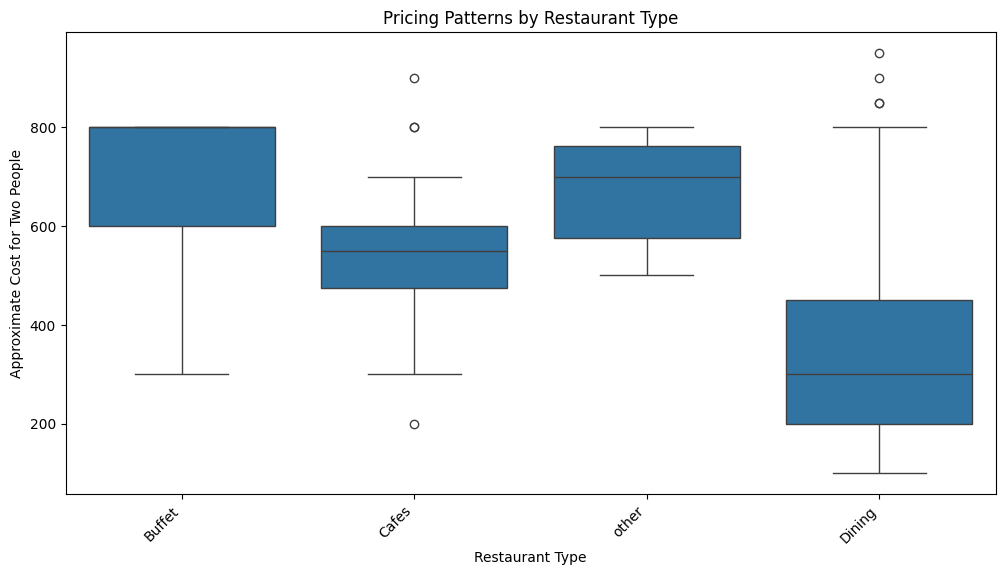

In [15]:

pricing_patterns = data.groupby('listed_in(type)')['approx_cost(for two people)'].describe()

print(pricing_patterns)

# Visualize the pricing distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Pricing Patterns by Restaurant Type')
plt.ylabel('Approximate Cost for Two People')
plt.xlabel('Restaurant Type')
plt.show()

# Further analysis:
# - Calculate price ranges (min, max, quartiles) for each category.
# - Identify outliers in pricing for specific categories.
# - Consider other factors that might influence pricing, such as location or cuisine.

Most listed restaurant types:
 listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


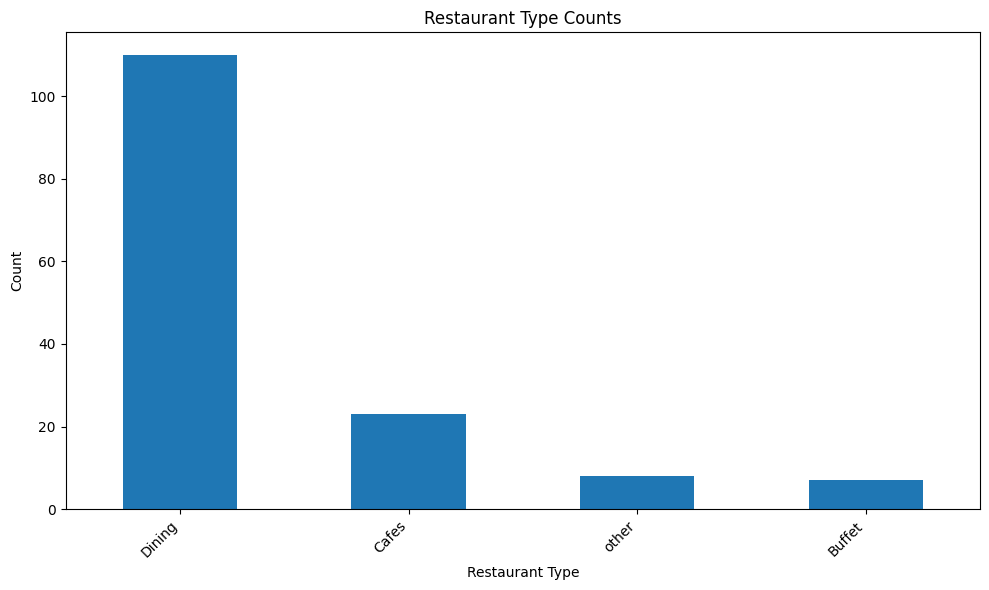


Average votes per restaurant type:
 listed_in(type)
Buffet     432.571429
Cafes      279.739130
Dining     185.118182
other     1170.875000
Name: votes, dtype: float64


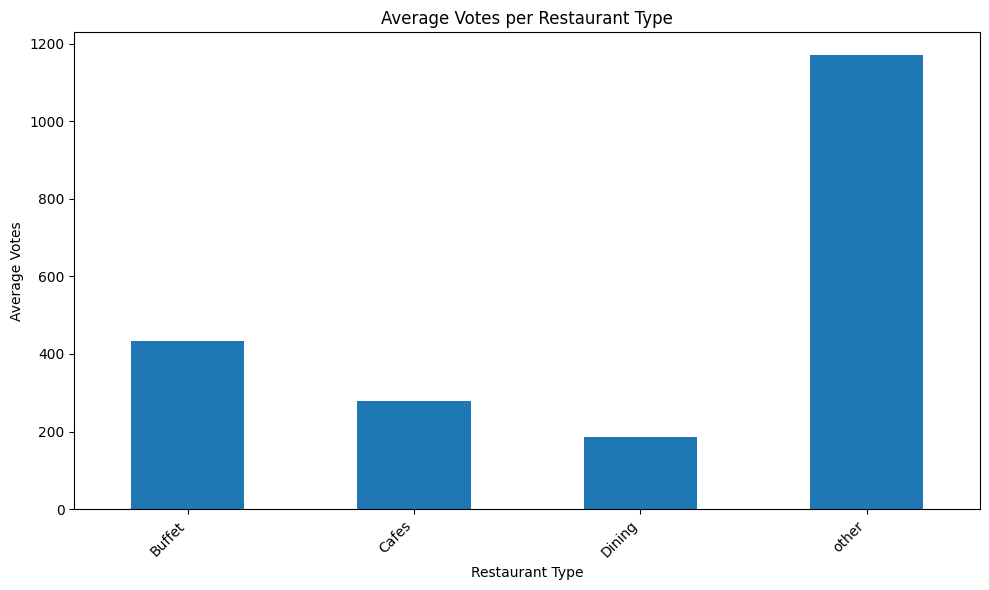

In [16]:

restaurant_type_counts = data['listed_in(type)'].value_counts()


print("Most listed restaurant types:\n", restaurant_type_counts)


plt.figure(figsize=(10, 6))
restaurant_type_counts.plot(kind='bar')
plt.title('Restaurant Type Counts')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


votes_by_type = data.groupby('listed_in(type)')['votes'].mean()
print("\nAverage votes per restaurant type:\n", votes_by_type)


plt.figure(figsize=(10, 6))
votes_by_type.plot(kind='bar')
plt.title('Average Votes per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()